### **Python code for analysis of Wallmart data globally**


1.   **Story telling about the Wallmart dataset**
2.   **Preprocessing**
      *   Checking for the presence of required columns
      *   Checking for Nullvalues
      *   Adding order Month as the new column
3. **Perform the below analysis on the Wallmart data by plotting a graph**

*   What is the total Sales that has happened for each product category globally
*   Analyse the profit obtained with respect to discounts given for different product category
*   What is the performance w.r.t Sales in every region
*   Analyse the sales behavior for the different customer segments
*   Analyse the global sales trend that is happening between 2012 to 2015 month-wise








   
   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                        Order ID Order Date  Ship Date       Ship Mode  \
Row ID                                                                   
40098   CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
26341     IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
25330     IN-2014-CR127307-41929 2014-10-17 2014-10-18     First Class   
13524    ES-2014-KM1637548-41667 2014-01-28 2014-01-30     First Class   
47221    SG-2014-RH9495111-41948 2014-11-05 2014-11-06        Same Day   
...                          ...        ...        ...             ...   
29002    IN-2015-KE1642066-42174 2015-06-19 2015-06-19        Same Day   
34337   US-2014-ZD21925140-41765 2014-05-06 2014-05-10  Standard Class   
31315   CA-2012-ZD21925140-41147 2012-08-26 2012-08-31    Second Class   
9596     MX-2013-RB1979518-41322 2013-02-17 2013-02-21  S

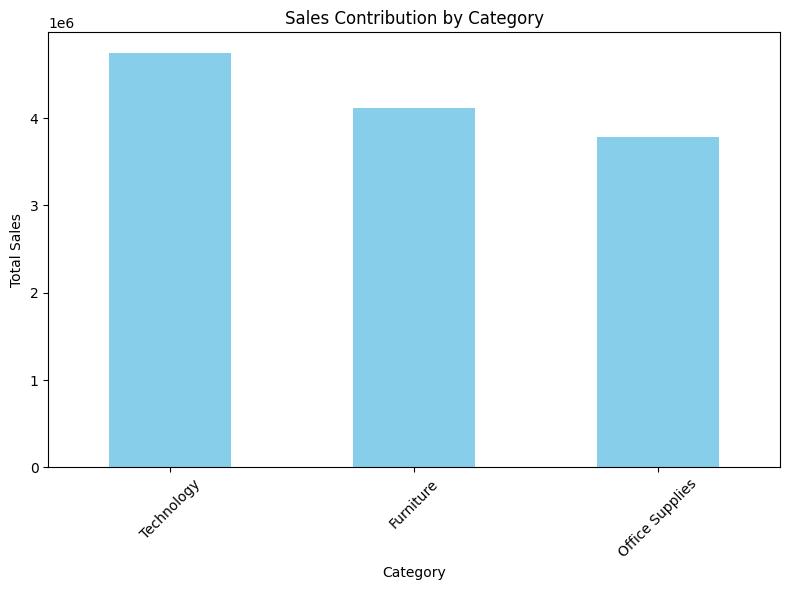

<ipython-input-2-80cc678d3973>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette = "Set1")


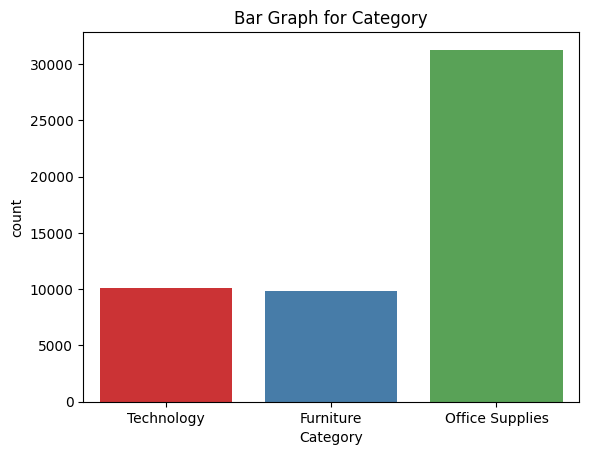

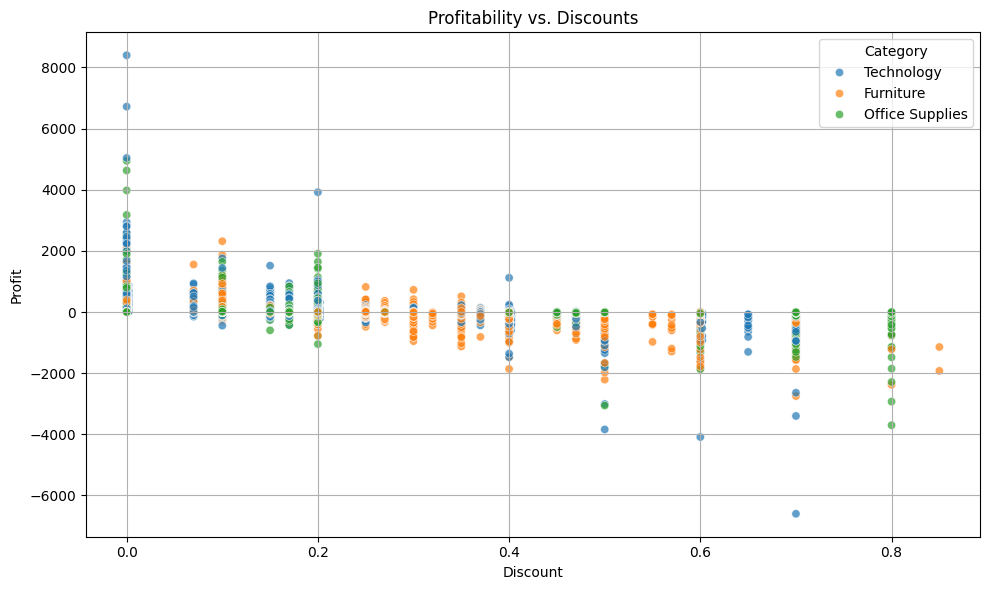

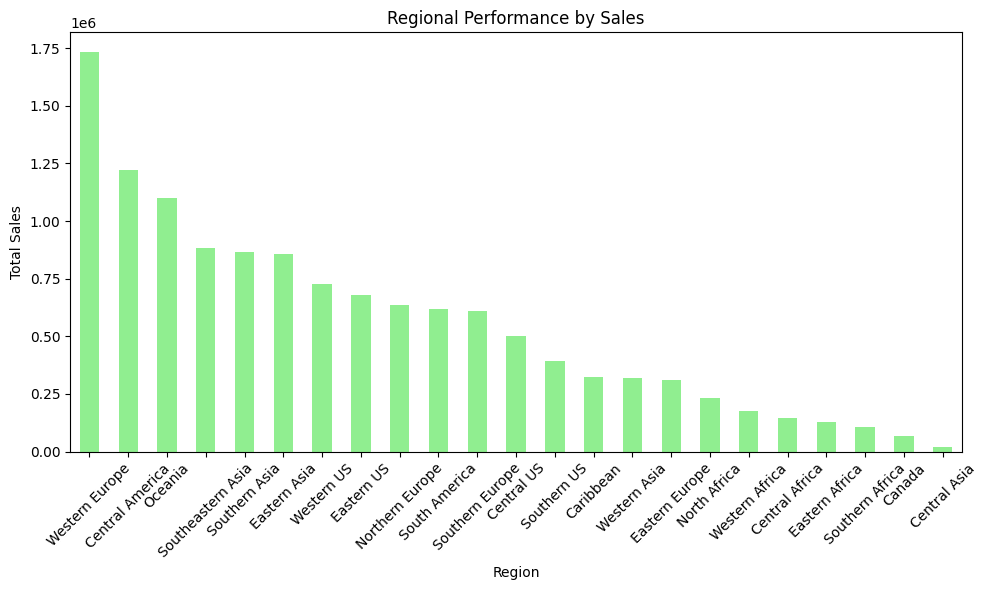

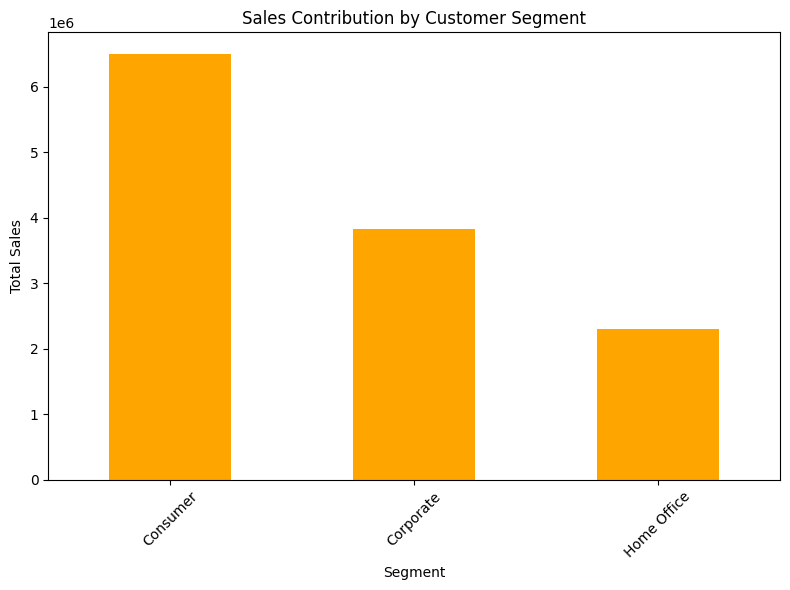

                        Order ID Order Date  Ship Date       Ship Mode  \
Row ID                                                                   
40098   CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
26341     IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
25330     IN-2014-CR127307-41929 2014-10-17 2014-10-18     First Class   
13524    ES-2014-KM1637548-41667 2014-01-28 2014-01-30     First Class   
47221    SG-2014-RH9495111-41948 2014-11-05 2014-11-06        Same Day   
...                          ...        ...        ...             ...   
29002    IN-2015-KE1642066-42174 2015-06-19 2015-06-19        Same Day   
34337   US-2014-ZD21925140-41765 2014-05-06 2014-05-10  Standard Class   
31315   CA-2012-ZD21925140-41147 2012-08-26 2012-08-31    Second Class   
9596     MX-2013-RB1979518-41322 2013-02-17 2013-02-21  Standard Class   
6147     MX-2013-MC1810093-41416 2013-05-22 2013-05-26    Second Class   

         Customer ID       Customer N

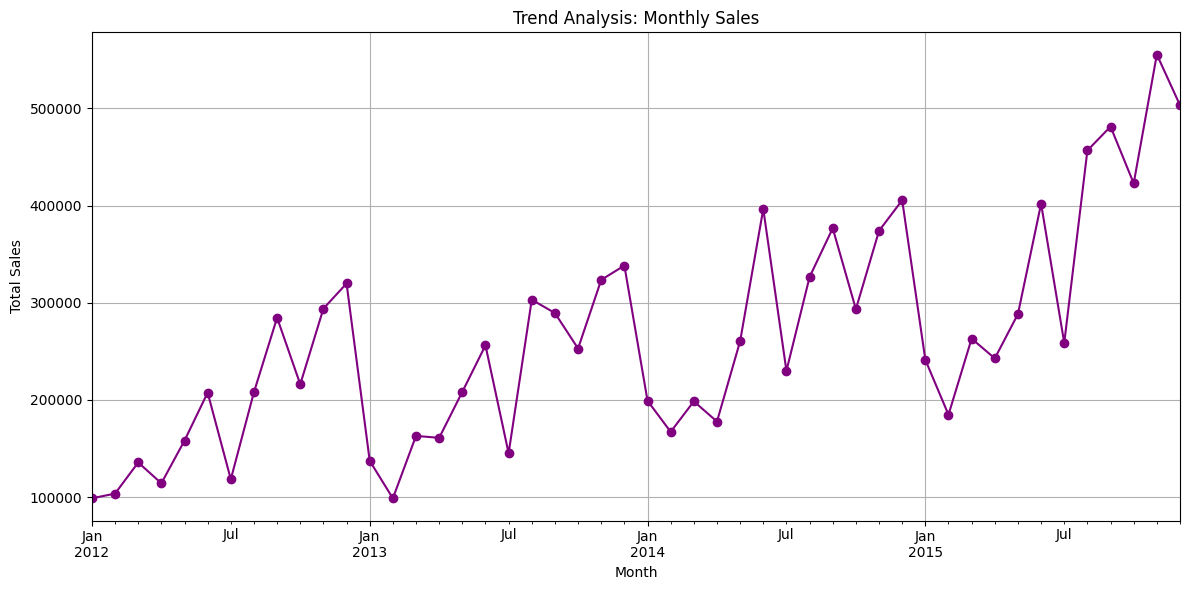

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the CSV file in your Drive
#path = '/content/drive/My Drive/Diwali_Sales_Data.csv'

# Load the Excel file
file_path = '/content/drive/My Drive/global_superstore_2016.xlsx'

# Load the data (adjust the sheet name if needed)
df = pd.read_excel(file_path, index_col=0)
print(df)

# Inspect the data structure
print("Columns in the dataset:")
print(df.columns)

# Ensure relevant columns exist
required_columns = ['Category', 'Sales', 'Profit', 'Discount', 'Region', 'Segment', 'Order Date']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' is missing from the dataset.")

# Sales Contribution by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Contribution by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.countplot(x='Category', data=df, palette = "Set1")
plt.title('Bar Graph for Category')
plt.show()

# Profitability vs. Discounts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title('Profitability vs. Discounts')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

# Regional Performance
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='lightgreen')
plt.title('Regional Performance by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Customer Segment Behavior
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
segment_sales.plot(kind='bar', color='orange')
plt.title('Sales Contribution by Customer Segment')
plt.ylabel('Total Sales')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trend Analysis (Monthly Sales)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')
print(df)
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='purple', marker='o')
plt.title('Trend Analysis: Monthly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


Explanation of the Graphs
Sales Contribution by Category: A pie chart shows the percentage of sales each category contributes.

Profitability vs. Discounts: A scatter plot highlights the relationship between discounts and profit, categorized by product categories.

Regional Performance: A bar chart displays sales per region, aiding focus on underperforming regions.

Customer Segment Behavior: A bar chart identifies revenue contributions from each customer segment.

Trend Analysis: A line chart visualizes sales trends over time to detect seasonal peaks